# take2

**GOAL**: Keep It Stupid Simple = KISS.

**Dependencies:**
 - [pocketknives](https://github.com/zjwilliams20/pocketknives)

**References:**
 1. [ilqgames/python](https://github.com/HJReachability/ilqgames/blob/master/python)

In [27]:
!echo $PYTHONPATH

/mnt/c/Users/Gover/Documents/projects/ICON_lab/decentralized/:/mnt/c/Users/Gover/Documents/projects/ICON_lab/pocketknives/


In [28]:
from time import perf_counter as pc

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from decentralized import split_agents
import decentralized as dec
import pocketknives

π = np.pi

In [2]:
%load_ext autoreload
%autoreload 1
%aimport decentralized.control, decentralized.dynamics, decentralized.cost, decentralized.problem, decentralized.util

In [3]:
%matplotlib widget
plt.rcParams['axes.grid'] = True

In [4]:
# fig = plt.figure(figsize=(3.7, 3.7))

In [5]:
def pos_mask(x_dims):
    """Return a mask that's true wherever there's an x or y position""" 
    return np.array([i % x_dims[0] < 2 for i in range(sum(x_dims))])

In [6]:
def plot_solve(X, J, x_goal, x_dims=None):
    """Plot the resultant trajectory on plt.gcf()"""

    if not x_dims:
        x_dims = [X.shape[1]]
        
    N = X.shape[0]
    t = np.arange(N) * dt
    
    X_split = split_agents(X, x_dims)
    x_goal_split = split_agents(x_goal.reshape(1,-1), x_dims)
    
    for Xi, xg in zip(X_split, x_goal_split):
        plt.scatter(Xi[:,0], Xi[:,1], c=t)
        plt.scatter(Xi[0,0], Xi[0,1], 80, 'g', 'x', label="$x_0$")
        plt.scatter(xg[0,0], xg[0,1], 80, 'r', 'x', label="$x_f$")
    
    plt.margins(0.1)
    plt.title(f"Final Cost: {J:.3g}")
    plt.draw()

In [7]:
def plot_solve_quad(X, J, x_goal, ax, x_dims = None):
    
    """Plot the resultant 3-dimensional trajectory on plt.gcf()"""

    if not x_dims:
        x_dims = [X.shape[1]]
    
    N = X.shape[0]
    t = np.arange(N) * dt
    
    X_split = split_agents(X, x_dims)
    x_goal_split = split_agents(x_goal.reshape(1,-1), x_dims)
    
    for Xi, xg in zip(X_split, x_goal_split):
        ax.scatter(Xi[:,0], Xi[:,1], Xi[:,2], c = t)
        ax.scatter(Xi[0,0], Xi[0,1], Xi[0,2], s = 60,  label="$x_0$")
        ax.scatter(xg[0,0], xg[0,1], xg[0,2], s = 60,  label="$x_f$")
   
    ax.set_xlabel('$X(m)$')
    ax.set_ylabel('$Y(m)$')
    ax.set_zlabel('$Z(m)$')
    # ax.legend()
    plt.margins(0.1)
    plt.title(f"Final Cost: {J:.3g}")
    plt.draw()
    

## single-agent problem

0/50	J: 210000
1/50	J: 106471	μ: 0.5	Δ: 0.5
2/50	J: 6814.4	μ: 0.125	Δ: 0.25
3/50	J: 5523.71	μ: 0.015625	Δ: 0.125
4/50	J: 5000.41	μ: 0.000976562	Δ: 0.0625
5/50	J: 3894.41	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 3385.56	μ: 0	Δ: 0.015625
7/50	J: 3111.4	μ: 0	Δ: 0.0078125
8/50	J: 3069.25	μ: 0	Δ: 0.00390625
9/50	J: 3015.34	μ: 0	Δ: 0.00195312
10/50	J: 2989.83	μ: 0	Δ: 0.000976562
11/50	J: 2979.62	μ: 0	Δ: 0.000488281


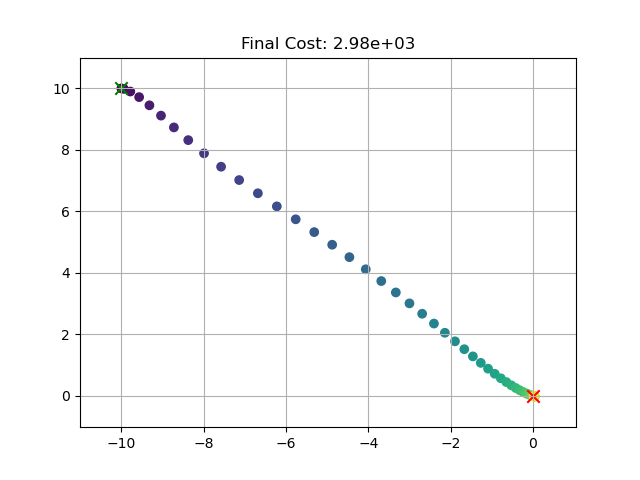

In [24]:
#Single-agent problem for a unicycle (w/ analytical diff.)
dt = 0.1
N = 50

x = np.array([-10, 10, 0, 0], dtype=float)
x_goal = np.zeros((4, 1), dtype=float).T

dynamics = dec.UnicycleDynamics4D(dt)

Q = np.diag([1., 1, 0, 0])
Qf = 1000 * np.eye(Q.shape[0])
R = np.eye(2)
cost = dec.ReferenceCost(x_goal, Q, R, Qf)

prob = dec.ilqrProblem(dynamics, cost)
ilqr = dec.ilqrSolver(prob, N)
X, U, J = ilqr.solve(x)

plt.figure(dpi=100)
plot_solve(X, J, x_goal)

In [10]:
plt.clf()

In [11]:
# quad_12D = dec.QuadcopterDynamicsSymbolic(0)
# x_try = np.array([0.5,0.3,0.5,0,0,0,0.5,0.5,0.2,0,0,0])
# u_try = np.array([0,0,0,2])
# quad_12D._f(x_try,u_try)


0/50	J: 1.81489e+06
1/50	J: 7126.09	μ: 0.5	Δ: 0.5
2/50	J: 515.819	μ: 0.125	Δ: 0.25
3/50	J: 484.752	μ: 0.015625	Δ: 0.125
4/50	J: 478.504	μ: 0.000976562	Δ: 0.0625
5/50	J: 477.494	μ: 3.05176e-05	Δ: 0.03125


TypeError: plot_solve_quad() missing 1 required positional argument: 'ax'

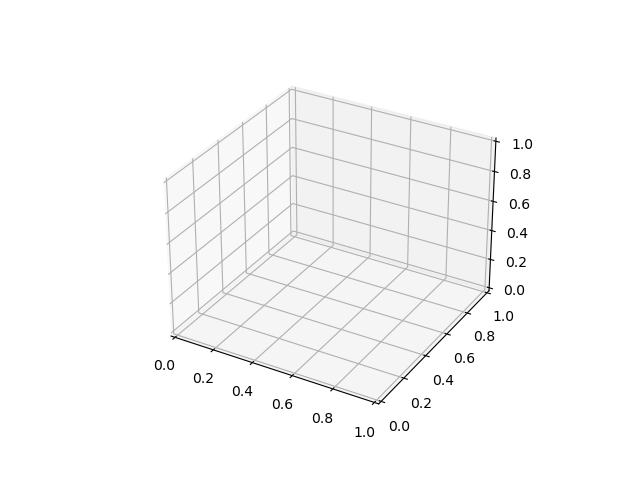

In [25]:
#Single-agent problem for a 12-D quadcopter (w/ analytical diff.)
dt = 0.01
N = 260

x = np.array([1, 1, 0.8 , 0.05, 0, 0, 0.2, 0.5, 0, 0, 0, 0], dtype=float) #initial condition
x_goal = np.zeros((12, 1), dtype=float).T


dynamics = dec.QuadcopterDynamics12D(dt)

Q = np.diag([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ])
Qf = 1000 * np.eye(Q.shape[0])
R = np.eye(4)
cost = dec.ReferenceCost(x_goal, Q, R, Qf)

prob = dec.ilqrProblem(dynamics, cost)
ilqr = dec.ilqrSolver(prob, N)
X, U, J = ilqr.solve(x)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_solve_quad(X, J, x_goal, ax)


In [13]:
plt.clf()

In [20]:
print(X[-1,0],X[-1,1],X[-1,2]) #simulated final position
print(x_goal) #designated goal position

# hmm... not too bad 

0.029069097747650097 0.03268088269817988 0.01187581819956625
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
#Single-agent problem for a 6-D quadcopter (w/ analytical diff.)
dt = 0.05
N = 50

x = np.array([1, 1, 0.8 , 0.05, 0, 0], dtype=float) #initial condition
x_goal = np.zeros((6, 1), dtype=float).T


dynamics = dec.QuadcopterDynamics6D(dt)

Q = np.diag([1, 1, 1, 1, 1, 1])
Qf = 1000 * np.eye(Q.shape[0])
R = np.eye(3)
cost = dec.ReferenceCost(x_goal, Q, R, Qf)

prob = dec.ilqrProblem(dynamics, cost)
ilqr = dec.ilqrSolver(prob, N)
X, U, J = ilqr.solve(x)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_solve_quad(X, J, x_goal)

TypeError: 'float' object is not subscriptable

## multi-agent problem (Quadcopters)

### initializing the scene
Here, we define some initial positions within some distance of each other, and then rotate them about the origin by some random angle to hopefully create some interesting scenarios.

In [8]:
def paper_setup():
    """Hardcoded example with reasonable consistency eyeballed from 
       Potential-iLQR paper
    """
    x0 = np.array([[0.5, 1.5, 0, 0.1,
                    2.5, 1.5, 0, π,
                    1.5, 1.3, 0, π/2]], 
                    dtype=float).T
    x_goal = np.array([[2.5, 1.5, 0, 0, 
                        0.5, 1.5, 0, π, 
                        1.5, 2.2, 0, π/2]]).T
    return x0, x_goal

def car_setup():
    """Same as paper_setup but using car dynamics"""
    x0, x_goal = paper_setup()
    car_mask = [i % 4 < 3 for i in range(x0.shape[0])]
    return x0[car_mask], x_goal[car_mask]

def bike_setup():
    """Same as paper_setup but using bike dynamics"""
    N_AGENTS = 3
    N_STATES = 5
    n_total_states = N_AGENTS * N_STATES
    bike_mask = [i % 5 < 4 for i in range(n_total_states)]
    
    x0, x_goal = paper_setup()
    x0_bike = np.zeros((n_total_states, 1))
    x_goal_bike = np.zeros_like(x0_bike)
    x0_bike[bike_mask] = x0
    x_goal_bike[bike_mask] = x_goal
    
    return x0_bike, x_goal_bike

def double_int_setup():
    x0, x_goal = paper_setup()
    theta_mask = [i % 4 == 2 for i in range(x0.shape[0])]
    x0[theta_mask] = 0.0
    x_goal[theta_mask] = 0.0

    return x0, x_goal

def dec_test_setup():
    x0, x_goal = paper_setup()
    x0_other = np.array([[5, 5, 0, 0,
                          6, 6, 0, π/4]]).T
    x_goal_other = np.array([[6, 4, 0, -π/2,
                              4, 6, 0, π/4]]).T
    
    x0 = np.concatenate([x0, x0_other]) 
    x_goal = np.concatenate([x_goal, x_goal_other])    
    
    return x0, x_goal



To be consistent between simulations, we normalize for the scale of the setup by computing the *energy*, or the sum of distances from the origin of the points. This should be the same for all runs.

In [9]:
def compute_energy(x, x_dims):
    """Determine the sum of distances from the origin"""
    return np.linalg.norm(x[pos_mask(x_dims)].reshape(-1,2), axis=1).sum()

def normalize_energy(x, x_dims, energy=10.0):
    """Zero-center the coordinates and then ensure the sum of 
       squared distances == energy
    """
    
    # Don't mutate x's data for this function, keep it pure.
    x = x.copy()
    n_agents = len(x_dims)
    center = x[pos_mask(x_dims)].reshape(-1, 2).mean(0)

    x[pos_mask(x_dims)] -= np.tile(center, n_agents).reshape(-1,1)
    x[pos_mask(x_dims)] *= energy / compute_energy(x, x_dims)
    assert x.size == sum(x_dims)
    
    return x

def perturb_state(x, x_dims, var=0.5):
    """Add a little noise to the start to knock off perfect symmetries"""
    
    x = x.copy()
    x[pos_mask(x_dims)] += var*np.randn_like(x[pos_mask(x_dims)])
    return x

#### Centralized Multi-agent experiment with unicycles:

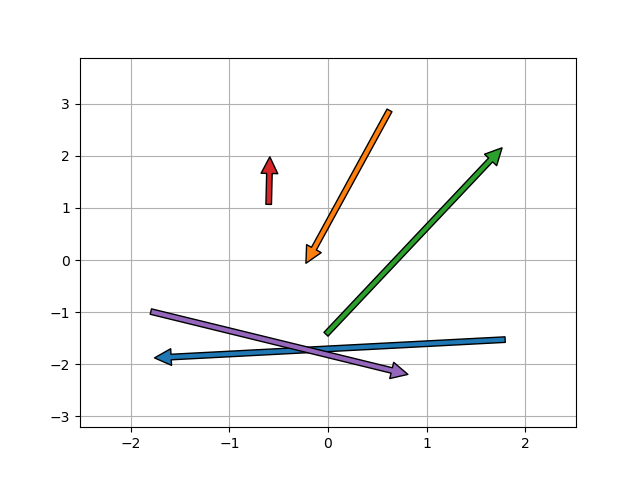

In [24]:
n_agents = 5
n_states = 4
n_controls = 2
ENERGY = 10.0
# x0, x_goal = paper_setup()
# x0, x_goal = car_setup()
# x0, x_goal = bike_setup()
# x0, x_goal = double_int_setup()
# x0, x_goal = dec_test_setup()
x0, x_goal = dec.random_setup(n_agents, n_states, is_rotation=False, min_sep=1.0, var=1.0)

x_dims = [n_states] * n_agents
u_dims = [n_controls] * n_agents

x0 = normalize_energy(x0, x_dims, ENERGY)
x_goal = normalize_energy(x_goal, x_dims, ENERGY)
# x0 = perturb_state(x0, x_dims)

plt.clf()
plt.gca().set_aspect('equal')
plt.figure()
X = np.dstack([
    x0.reshape(n_agents, n_states), 
    x_goal.reshape(n_agents, n_states)
]).swapaxes(1,2)
for i, Xi in enumerate(X):
    plt.annotate('', Xi[1,:2], Xi[0,:2], 
                 arrowprops=dict(facecolor=plt.cm.tab20.colors[2*i]))
pocketknives.set_bounds(X.reshape(-1, n_states), zoom=0.2)
plt.draw()

In [25]:
dt = 0.05
N = 50
tol = 1e-3
ids = [100 + i for i in range(n_agents)]

model = dec.UnicycleDynamics4D
# model = dec.CarDynamics3D
# model = dec.BikeDynamics5D
# model = dec.DoubleIntDynamics4D
dynamics = dec.MultiDynamicalModel([model(dt, id_) for id_ in ids])

Q = 4 * np.diag(np.array([1., 1, 0, 0]))
# Qf = 1000 * np.eye(Q.shape[0])
Qf = 1000 * np.diag(np.array([1., 1, 1, 1]))
R = np.eye(2)

# radius = ENERGY / 20
radius = 0.5

goal_costs = [dec.ReferenceCost(x_goal_i, Q.copy(), R.copy(), Qf.copy(), id_) 
              for x_goal_i, id_ in zip(split_agents(x_goal.T, x_dims), ids)]
prox_cost = dec.ProximityCost(x_dims, radius)
game_cost = dec.GameCost(goal_costs, prox_cost)

prob = dec.ilqrProblem(dynamics, game_cost)

In [26]:
%%time
# %%prun
ilqr = dec.ilqrSolver(prob, N)
t0 = pc()
X, U, J = ilqr.solve(x0, tol=tol)

0/50	J: 56594.2
1/50	J: 6088.72	μ: 0.5	Δ: 0.5
2/50	J: 4224.38	μ: 0.125	Δ: 0.25
3/50	J: 4106.67	μ: 0.015625	Δ: 0.125
4/50	J: 4086.58	μ: 0.000976562	Δ: 0.0625
CPU times: user 984 ms, sys: 31.2 ms, total: 1.02 s
Wall time: 1 s


In [27]:
plt.clf()
plot_solve(X, J, x_goal, x_dims)

In [28]:
plt.clf()
plt.plot(dec.compute_pairwise_distance(X, x_dims).T)
plt.hlines(radius, *plt.xlim(), 'r', ls='--')
plt.draw()

In [29]:
costs = []
for xi, ui in zip(X, U):
    costs.append(game_cost(xi, ui).item())
plt.clf()
plt.plot(costs)
plt.draw()

#### Centralized Multi-agent experiment with quadcopters (12D):

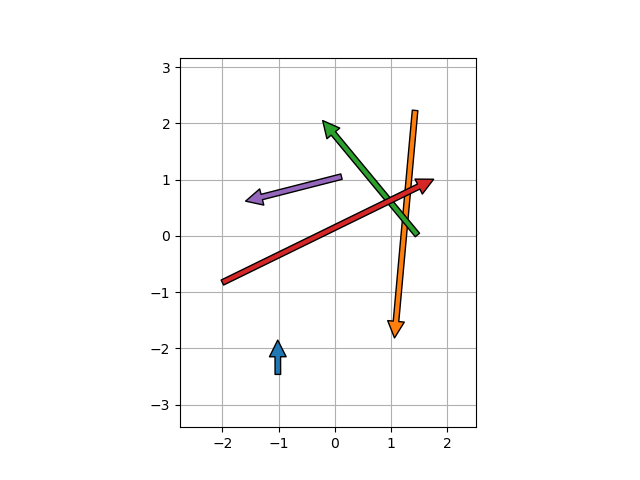

In [121]:
n_agents = 5
n_states = 12
n_controls = 4
ENERGY = 10.0

x0, x_goal = dec.random_setup(n_agents, n_states, is_rotation=False, min_sep=1.0, var=1.0)

x_dims = [n_states] * n_agents
u_dims = [n_controls] * n_agents

x0 = normalize_energy(x0, x_dims, ENERGY)
x_goal = normalize_energy(x_goal, x_dims, ENERGY)
# x0 = perturb_state(x0, x_dims)

plt.clf()
plt.figure(dpi=100)
plt.gca().set_aspect('equal')
X = np.dstack([
    x0.reshape(n_agents, n_states), 
    x_goal.reshape(n_agents, n_states)
]).swapaxes(1,2)
for i, Xi in enumerate(X):
    plt.annotate('', Xi[1,:2], Xi[0,:2], 
                 arrowprops=dict(facecolor=plt.cm.tab20.colors[2*i]))
pocketknives.set_bounds(X.reshape(-1, n_states), zoom=0.2)
plt.draw()

In [122]:
dt = 0.05
N = 50
tol = 1e-3
ids = [100 + i for i in range(n_agents)]

model = dec.QuadcopterDynamics12D
dynamics = dec.MultiDynamicalModel([model(dt, id_) for id_ in ids])

Q = np.diag([10., 10., 10., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Qf = 1000 * np.eye(Q.shape[0])

R = np.eye(4)

# radius = ENERGY / 20
radius = 0.5

goal_costs = [dec.ReferenceCost(x_goal_i, Q.copy(), R.copy(), Qf.copy(), id_) 
              for x_goal_i, id_ in zip(split_agents(x_goal.T, x_dims), ids)]
prox_cost = dec.ProximityCost(x_dims, radius)
game_cost = dec.GameCost(goal_costs, prox_cost)

prob = dec.ilqrProblem(dynamics, game_cost)

0/50	J: 8.17762e+06
1/50	J: 5.09559e+06	μ: 0.5	Δ: 0.5
2/50	J: 4.20093e+06	μ: 0.125	Δ: 0.25
3/50	J: 2.57938e+06	μ: 0.015625	Δ: 0.125
4/50	J: 866140	μ: 0.000976562	Δ: 0.0625
5/50	J: 534108	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 185339	μ: 0	Δ: 0.015625
7/50	J: 123759	μ: 0	Δ: 0.0078125
8/50	J: 82817.2	μ: 0	Δ: 0.00390625
9/50	J: 13716.8	μ: 0	Δ: 0.00195312
10/50	J: 10260.1	μ: 0	Δ: 0.000976562
11/50	J: 6607.71	μ: 0	Δ: 0.000488281
12/50	J: 6168.39	μ: 0	Δ: 0.000244141
13/50	J: 6141.49	μ: 0	Δ: 0.00012207
CPU times: user 39.7 s, sys: 312 ms, total: 40 s
Wall time: 22.9 s


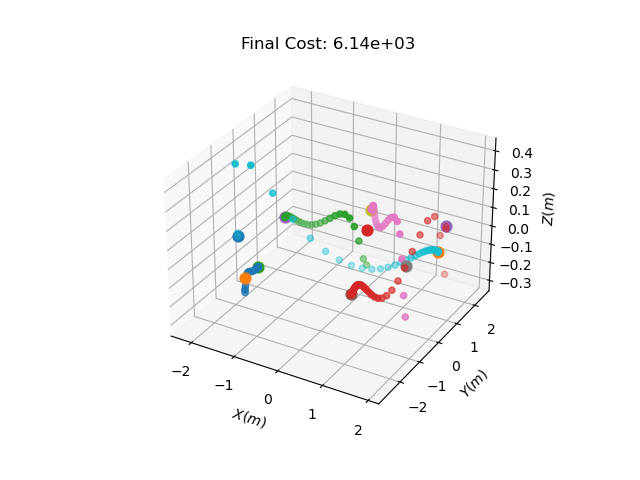

In [123]:
%%time
# %%prun
ilqr = dec.ilqrSolver(prob, N)
t0 = pc()

X, U, J = ilqr.solve(x0, tol=tol)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_solve_quad(X, J, x_goal, x_dims)

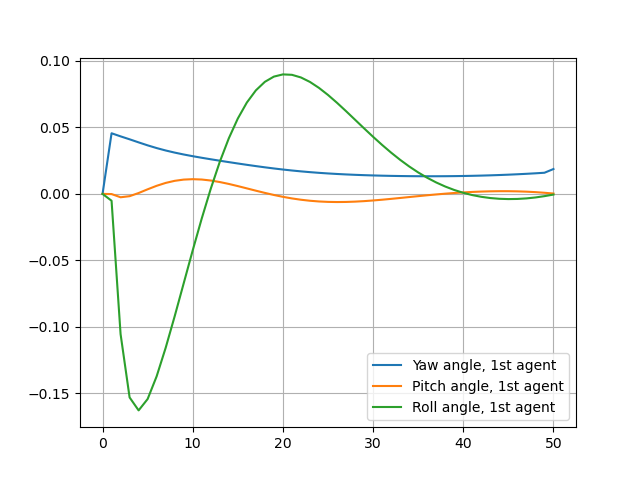

In [124]:
"""It turns out that the Euler angles are not smooth (there are sharp turns) at some horizon:"""
plt.figure()
plt.plot(np.arange(N+1),X[:,3],label='Yaw angle, 1st agent')
plt.plot(np.arange(N+1),X[:,4],label='Pitch angle, 1st agent')
plt.plot(np.arange(N+1),X[:,5],label='Roll angle, 1st agent')
plt.legend();

#### Centralized Multi-agent experiment with quadcopters (6D):

In [19]:
n_agents = 3
n_states = 6
n_controls = 3
ENERGY = 10.0

x0, x_goal = dec.random_setup(n_agents, n_states, is_rotation=False, n_d = 3)
# x0 = np.array([[1, 1, 0.3, 0, 0, 0, 0.5, 0.5, 0.2, 0, 0, 0, 0.25, 0.25, 0.2, 0, 0, 0]]).T
# x_goal = np.zeros((18,1))
x0[2] = 0.3
x0[8] = 0.25
x0[14] = 0.35

x_dims = [n_states] * n_agents
u_dims = [n_controls] * n_agents

x0 = normalize_energy(x0, x_dims, ENERGY)
x_goal = normalize_energy(x_goal, x_dims, ENERGY)
# x0 = perturb_state(x0, x_dims)

# plt.clf()
# plt.figure(dpi=100)
# plt.gca().set_aspect('equal')
# X = np.dstack([
#     x0.reshape(n_agents, n_states), 
#     x_goal.reshape(n_agents, n_states)
# ]).swapaxes(1,2)
# for i, Xi in enumerate(X):
#     plt.annotate('', Xi[1,:2], Xi[0,:2], 
#                  arrowprops=dict(facecolor=plt.cm.tab20.colors[2*i]))
# pocketknives.set_bounds(X.reshape(-1, n_states), zoom=0.2)
# plt.draw()

In [20]:
dt = 0.05
N = 50
tol = 1e-3
ids = [100 + i for i in range(n_agents)]

model = dec.QuadcopterDynamics6D
dynamics = dec.MultiDynamicalModel([model(dt, id_) for id_ in ids])

Q = np.diag([10., 10., 10., 1., 1., 1.])
Qf = 1000 * np.eye(Q.shape[0])

R = np.eye(3)

# radius = ENERGY / 20
radius = 0.5

goal_costs = [dec.ReferenceCost(x_goal_i, Q.copy(), R.copy(), Qf.copy(), id_) 
              for x_goal_i, id_ in zip(split_agents(x_goal.T, x_dims), ids)]
prox_cost = dec.ProximityCost(x_dims, radius)
game_cost = dec.GameCost(goal_costs, prox_cost)

prob = dec.ilqrProblem(dynamics, game_cost)

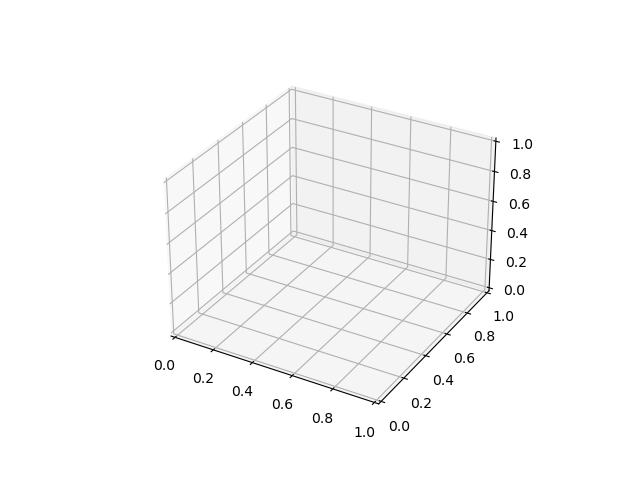

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

In [22]:
%%time
# %%prun
ilqr = dec.ilqrSolver(prob, N)
t0 = pc()

X, U, J = ilqr.solve(x0, tol=tol)

plot_solve_quad(X, J, x_goal, ax, x_dims)

0/50	J: 5.04669e+06
1/50	J: 139809	μ: 0.5	Δ: 0.5
2/50	J: 134008	μ: 0.125	Δ: 0.25
3/50	J: 119854	μ: 0.015625	Δ: 0.125
4/50	J: 112390	μ: 0.000976562	Δ: 0.0625
5/50	J: 67965.2	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 67332.2	μ: 0	Δ: 0.015625
7/50	J: 66798.6	μ: 0	Δ: 0.0078125
8/50	J: 66266.8	μ: 0	Δ: 0.00390625
9/50	J: 64346.6	μ: 0	Δ: 0.00195312
10/50	J: 62325	μ: 0	Δ: 0.000976562
11/50	J: 59481.8	μ: 0	Δ: 0.000488281
12/50	J: 49927.9	μ: 0	Δ: 0.000244141
13/50	J: 48728.2	μ: 0	Δ: 0.00012207
14/50	J: 47555.6	μ: 0	Δ: 6.10352e-05
15/50	J: 46613.5	μ: 0	Δ: 3.05176e-05
16/50	J: 44175.2	μ: 0	Δ: 1.52588e-05
17/50	J: 42242.4	μ: 0	Δ: 7.62939e-06
18/50	J: 38673	μ: 0	Δ: 3.8147e-06
19/50	J: 38251.4	μ: 0	Δ: 1.90735e-06
20/50	J: 37850.8	μ: 0	Δ: 9.53674e-07
21/50	J: 37002.6	μ: 0	Δ: 4.76837e-07
22/50	J: 36674.4	μ: 0	Δ: 2.38419e-07
23/50	J: 36573.7	μ: 0	Δ: 1.19209e-07
24/50	J: 36363	μ: 0	Δ: 5.96046e-08
25/50	J: 35900.1	μ: 0	Δ: 2.98023e-08
26/50	J: 35398.7	μ: 0	Δ: 1.49012e-08
27/50	J: 31988.9	μ: 0	Δ: 7.45058e-09
28/50	

In [75]:
plt.clf()

## centralized receding-horizon multi-agent experiment (6D quadcopters)

--------------------------------------------------
Horizon 0
0/50	J: 5.20745e+06
1/50	J: 200617	μ: 0.5	Δ: 0.5
2/50	J: 122126	μ: 0.125	Δ: 0.25
3/50	J: 99368.3	μ: 0.015625	Δ: 0.125
4/50	J: 96137.2	μ: 0.000976562	Δ: 0.0625
5/50	J: 95966.7	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 95244.7	μ: 0	Δ: 0.015625


KeyboardInterrupt: 

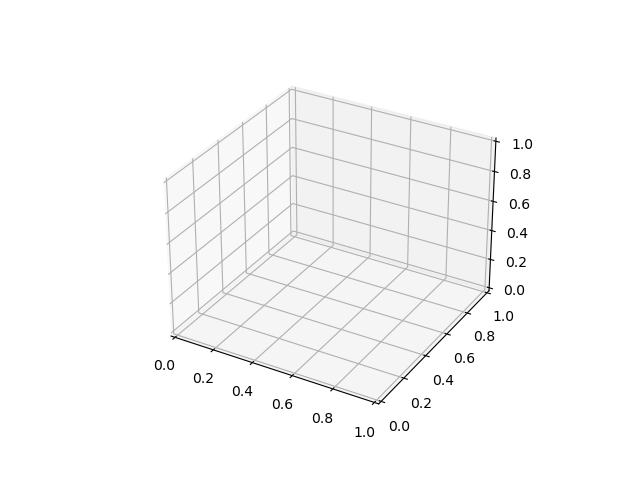

In [18]:
rhc = dec.RecedingHorizonController(x0, ilqr, step_size=1) #step_size is the prediction horizon at each time step
U0 = np.zeros((ilqr.N, ilqr.n_u))
# plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

fig.canvas.draw()

for Xi, Ui, Ji in rhc.solve(U0, J_converge=15000.0, tol=tol):
    plt.cla()
    plot_solve_quad(Xi, Ji, x_goal, ax , x_dims)
    fig.canvas.draw()
   
    

## decentralized multi-agent experiment (6D quadcopters)

In [25]:
graph = dec.define_inter_graph_threshold(X, radius/2, x_dims, ids)
graph

{100: [100, 101], 101: [100, 101], 102: [102]}

In [26]:
# plt.clf()
# dec.plot_interaction_graph(graph)
# plt.draw()

In [27]:
plt.close('all')

In [28]:
X0 = np.tile(x0.T, (N,1))
U0 = np.zeros((N, n_controls*n_agents))

In [29]:
%%time
X_dec, U_dec, J_dec = dec.solve_decentralized(prob, X0, U0, radius, is_mp=False)

0/50	J: 1.47446e+06
1/50	J: 103060	μ: 0.5	Δ: 0.5
2/50	J: 97822.9	μ: 0.125	Δ: 0.25
3/50	J: 85271.8	μ: 0.015625	Δ: 0.125
4/50	J: 70440.3	μ: 0.000976562	Δ: 0.0625
5/50	J: 67440.1	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 64661.9	μ: 0	Δ: 0.015625
7/50	J: 62313.1	μ: 0	Δ: 0.0078125
8/50	J: 61122.3	μ: 0	Δ: 0.00390625
9/50	J: 58758.6	μ: 0	Δ: 0.00195312
10/50	J: 56549.2	μ: 0	Δ: 0.000976562
11/50	J: 54486.7	μ: 0	Δ: 0.000488281
12/50	J: 52558.6	μ: 0	Δ: 0.000244141
13/50	J: 50754.6	μ: 0	Δ: 0.00012207
14/50	J: 49067	μ: 0	Δ: 6.10352e-05
15/50	J: 45110.4	μ: 0	Δ: 3.05176e-05
16/50	J: 37528.4	μ: 0	Δ: 1.52588e-05
17/50	J: 24837.6	μ: 0	Δ: 7.62939e-06
18/50	J: 24731.7	μ: 0	Δ: 3.8147e-06
19/50	J: 24505.2	μ: 0	Δ: 1.90735e-06
20/50	J: 24227.3	μ: 0	Δ: 9.53674e-07
21/50	J: 24058.6	μ: 0	Δ: 4.76837e-07
22/50	J: 23999.2	μ: 0	Δ: 2.38419e-07
23/50	J: 23870.6	μ: 0	Δ: 1.19209e-07
24/50	J: 23832.2	μ: 0	Δ: 5.96046e-08
25/50	J: 23790.3	μ: 0	Δ: 2.98023e-08
26/50	J: 23711.2	μ: 0	Δ: 1.49012e-08
Problem 100: [100]
Took 12.428464500

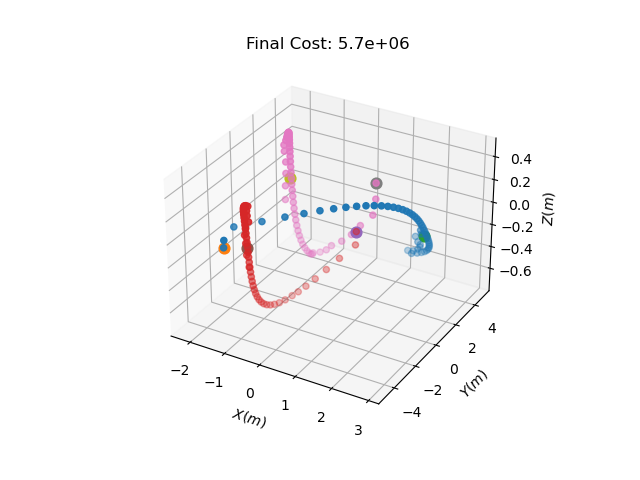

In [31]:
# plt.clf()
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(projection='3d')
plot_solve_quad(X_dec, J_dec, x_goal, x_dims)

## decentralized receding-horizon multi-agent experiment (6D quadcopters) 
Adding RHC to the decentralized implementation would just be a matter of indexing a subset of the generated states in the combined decentralized solutions.

In [59]:
X_dec[0].shape

(18,)

In [62]:
# rhc = dec.RecedingHorizonController(x0, ilqr, step_size=10)
# U0 = np.zeros((ilqr.N, ilqr.n_u))
# # plt.clf()

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# for Xi, Ui, Ji in rhc.solve(U0, J_converge=15200.0, tol=tol):
    
#     plot_solve_quad(Xi, Ji, x_goal, x_dims)
#     fig.canvas.draw()

--------------------------------------------------
Horizon 0
0/50	J: 5.7008e+06
1/50	J: 702297	μ: 0.5	Δ: 0.5
2/50	J: 562144	μ: 0.125	Δ: 0.25
3/50	J: 405854	μ: 0.015625	Δ: 0.125
4/50	J: 389555	μ: 0.000976562	Δ: 0.0625
5/50	J: 379982	μ: 3.05176e-05	Δ: 0.03125
6/50	J: 365406	μ: 0	Δ: 0.015625
7/50	J: 356912	μ: 0	Δ: 0.0078125
8/50	J: 341130	μ: 0	Δ: 0.00390625
9/50	J: 332257	μ: 0	Δ: 0.00195312
10/50	J: 316744	μ: 0	Δ: 0.000976562
11/50	J: 277045	μ: 0	Δ: 0.000488281
12/50	J: 245756	μ: 0	Δ: 0.000244141
13/50	J: 237097	μ: 0	Δ: 0.00012207
14/50	J: 228204	μ: 0	Δ: 6.10352e-05
15/50	J: 220085	μ: 0	Δ: 3.05176e-05
16/50	J: 213028	μ: 0	Δ: 1.52588e-05
17/50	J: 207345	μ: 0	Δ: 7.62939e-06
18/50	J: 206866	μ: 0	Δ: 3.8147e-06
19/50	J: 197271	μ: 0	Δ: 1.90735e-06
20/50	J: 190806	μ: 0	Δ: 9.53674e-07
21/50	J: 185450	μ: 0	Δ: 4.76837e-07
22/50	J: 166978	μ: 0	Δ: 2.38419e-07
23/50	J: 162671	μ: 0	Δ: 1.19209e-07
24/50	J: 151633	μ: 0	Δ: 5.96046e-08
25/50	J: 150654	μ: 0	Δ: 2.98023e-08
26/50	J: 147872	μ: 0	Δ: 1.49012e-08

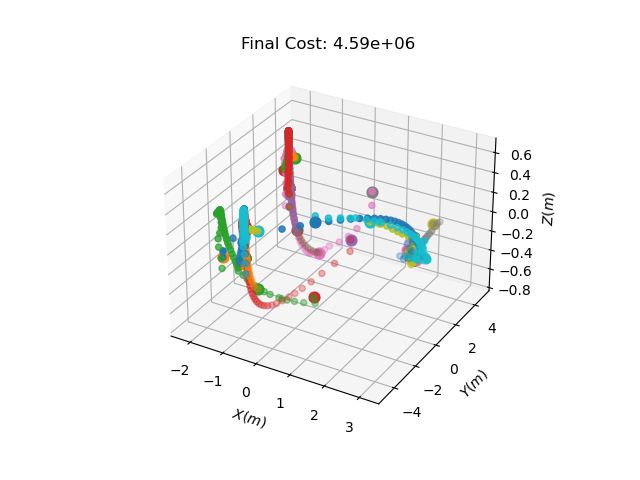

In [65]:
rhc = dec.RecedingHorizonController(x0, ilqr, step_size=10)
U0 = np.zeros((ilqr.N, ilqr.n_u))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for Xi, Ui, Ji in rhc.solve(U0, J_converge=15200.0, tol=tol):
    
    graph = dec.define_inter_graph_threshold(Xi, radius/2, x_dims, ids)
    
    X0_new = np.tile(Xi[0].T, (N,1))
    U0_new = np.zeros((N, n_controls*n_agents))
    
    X_dec, U_dec, J_dec = dec.solve_decentralized(prob, X0_new, U0_new, radius, is_mp=False)
    
    plot_solve_quad(X_dec, J_dec, x_goal, x_dims)
    

## animation

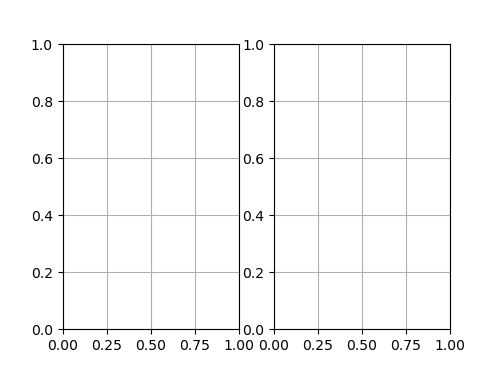

In [94]:
_, axes = plt.subplots(1, 2, figsize=(5.0, 3.7))

In [95]:
def setup(axes, X, x_goal, x_dims, radius):
    
    ax1, ax2 = axes
    n_agents = len(x_dims)
    handles1 = []
    for i in range(n_agents):
        handles1.append((
            ax1.plot(0, c=plt.cm.tab20.colors[2*i], marker='o', markersize=4)[0],
            ax1.add_artist(plt.Circle(np.nan, radius, color='k', fill=True, alpha=0.3, lw=2)),
        ))
        
    for xg in split_agents(x_goal, x_dims):
        ax1.scatter(xg[0,0], xg[0,1], c='r', marker='x', zorder=10)

    X_cat = np.vstack(split_agents(X, x_dims))
    pocketknives.set_bounds(X_cat, axes[0], zoom=0.15)
    plt.draw()
    
    handles2 = []
    n_pairs = pocketknives.nchoosek(n_agents, 2)
    for i in range(n_pairs):
        handles2.append(ax2.plot(0, c=plt.cm.tab20.colors[2*i])[0])
    ax2.hlines(radius, 0, X.shape[0], 'r', ls='--')
    ax2.set_ylim(0.0, distances.max())
        
    return handles1, handles2
    
def animate(t, handles1, handles2, X, x_dims, x_goal, distances):
    """Animate the solution into a gif"""
    
    for (i, xi), hi in zip(enumerate(split_agents(X, x_dims)), handles1):
        hi[0].set_xdata(xi[:t,0])
        hi[0].set_ydata(xi[:t,1])
        hi[1].set_center(xi[t-1,:2])
        
    for i, hi in enumerate(handles2):
        hi.set_xdata(range(t))
        hi.set_ydata(distances[:t, i])
    
    plt.draw()
    

In [96]:
distances = dec.compute_pairwise_distance(X, x_dims).T
handles1, handles2 = setup(axes, X, x_goal.flatten(), x_dims, radius)
animate(10, handles1, handles2, X, x_dims, x_goal, distances)
plt.draw()

AttributeError: module 'pocketknives' has no attribute 'nchoosek'

In [53]:
handles = setup(axes, X, x_goal.flatten(), x_dims, radius)
anim = FuncAnimation(
    plt.gcf(), 
    animate, 
    frames=N+1, 
    fargs=(*handles, X, x_dims, x_goal, distances))
anim.save('traj.gif', fps=5)

MovieWriter ffmpeg unavailable; using Pillow instead.
